In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
dataset_dir = 'E:/new dataset'
test_data_dir = 'E:/training_set'

img_width, img_height = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')  # Adjust if your labels are in a different format

Found 3037 images belonging to 5 classes.
Found 1300 images belonging to 5 classes.
Found 478 images belonging to 5 classes.


In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))  # Updated input_shape
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [7]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=100, steps_per_epoch=15)

test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/100
15/15 [==============================] - 39s 3s/step - loss: 1.7549 - accuracy: 0.2146 - val_loss: 1.6233 - val_accuracy: 0.2000
Epoch 2/100
15/15 [==============================] - 18s 1s/step - loss: 1.6124 - accuracy: 0.2354 - val_loss: 1.6011 - val_accuracy: 0.2000
Epoch 3/100
15/15 [==============================] - 19s 1s/step - loss: 1.5922 - accuracy: 0.2516 - val_loss: 1.5958 - val_accuracy: 0.2000
Epoch 4/100
15/15 [==============================] - 20s 1s/step - loss: 1.4791 - accuracy: 0.3125 - val_loss: 1.3910 - val_accuracy: 0.2762
Epoch 5/100
15/15 [==============================] - 20s 1s/step - loss: 1.2518 - accuracy: 0.4354 - val_loss: 1.0826 - val_accuracy: 0.3969
Epoch 6/100
15/15 [==============================] - 22s 1s/step - loss: 1.1307 - accuracy: 0.4729 - val_loss: 0.9712 - val_accuracy: 0.5031
Epoch 7/100
15/15 [==============================] - 19s 1s/step - loss: 0.9667 - accuracy: 0.5229 - val_loss: 0.7957 - val_accuracy: 0.5646
Epoch 8/100
1

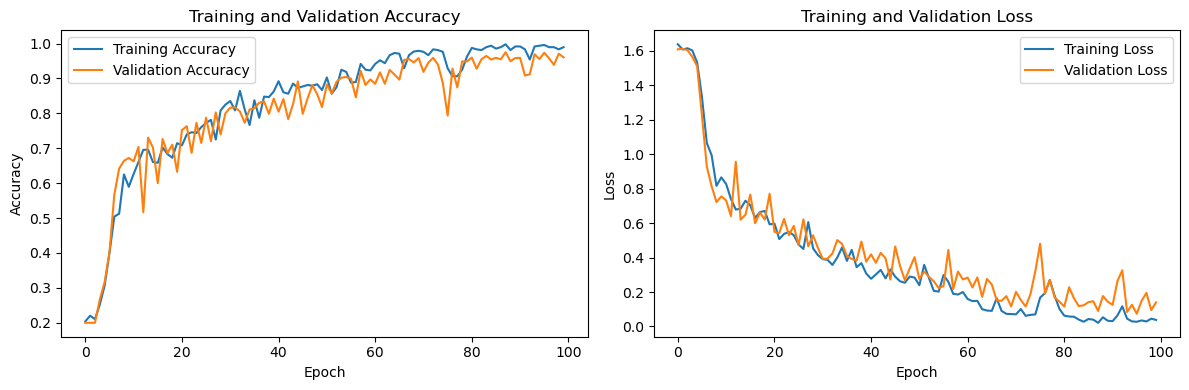

In [7]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()